In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import torch
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import MinMaxScaler, StandardScaler

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = pd.read_excel('174684_LSTM_data_for_Shreya.xlsx')

In [3]:
dataset.columns

Index(['Date/Timestamp', 'RTD', '1st Suct TC1', 'Air Inlet TC2', 'Evap In TC3',
       'Evap Out TC4', '2nd Suct TC6', 'Liquid Line TC7', '1st Sump TC8',
       '2nd Sump TC9', 'BPHX TC10', 'Setpoint', 'Voltage', 'Offset', 'WA',
       'CA', '1st RPM', '2nd RPM', 'Fan RPM', 'BUS RTD', 'RSSI', 'Latency',
       'State', 'HxHxRec', 'VscRefStageMSB', 'VscRefStageLSB'],
      dtype='object')

In [4]:
variances = dataset.var()
print("Variance of each column:")
print(variances)

Variance of each column:
RTD                3.574970e+01
1st Suct TC1       1.172584e+02
Air Inlet TC2      8.492743e-01
Evap In TC3        1.038308e+02
Evap Out TC4       3.576190e+01
2nd Suct TC6       9.661509e+01
Liquid Line TC7    8.765548e-01
1st Sump TC8       0.000000e+00
2nd Sump TC9       9.442868e+00
BPHX TC10          6.379819e+02
Setpoint           3.855661e+00
Voltage            1.994186e+01
Offset             0.000000e+00
WA                 5.048749e-29
CA                 2.019500e-28
1st RPM            1.289422e+04
2nd RPM            2.498466e+06
Fan RPM            7.516311e+01
BUS RTD            2.019500e-28
RSSI               2.019500e-28
Latency            0.000000e+00
State              4.033802e+00
HxHxRec            6.131744e+02
VscRefStageMSB     2.344159e+02
VscRefStageLSB     3.971982e+02
dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_15528\2461523735.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = dataset.var()


In [5]:
timestamp_col = dataset['Date/Timestamp']
data = dataset.drop(columns=['Date/Timestamp','1st Sump TC8','Offset','Latency'])

# Normalizing using Min-Max 
scaler_minmax = MinMaxScaler()
data_minmax = scaler_minmax.fit_transform(data)

# normalized data back to DataFrame
normalized_data_minmax = pd.DataFrame(data_minmax, columns=data.columns)

# Concatenate the timestamp column with the normalized data
normalized_dataset_minmax = pd.concat([timestamp_col, normalized_data_minmax], axis=1)

In [6]:
timestamp_col = normalized_dataset_minmax['Date/Timestamp']
normalized_dataset_minmax.columns

Index(['Date/Timestamp', 'RTD', '1st Suct TC1', 'Air Inlet TC2', 'Evap In TC3',
       'Evap Out TC4', '2nd Suct TC6', 'Liquid Line TC7', '2nd Sump TC9',
       'BPHX TC10', 'Setpoint', 'Voltage', 'WA', 'CA', '1st RPM', '2nd RPM',
       'Fan RPM', 'BUS RTD', 'RSSI', 'State', 'HxHxRec', 'VscRefStageMSB',
       'VscRefStageLSB'],
      dtype='object')

In [7]:
normalized_dataset_minmax

,Date/Timestamp,RTD,1st Suct TC1,Air Inlet TC2,Evap In TC3,Evap Out TC4,2nd Suct TC6,Liquid Line TC7,2nd Sump TC9,BPHX TC10,...,CA,1st RPM,2nd RPM,Fan RPM,BUS RTD,RSSI,State,HxHxRec,VscRefStageMSB,VscRefStageLSB
0,2022-07-21 04:00:00,0.005382,0.641929,0.809278,0.015322,0.013874,0.136752,0.852792,0.762821,0.549713,...,0.0,1.000000,0.512195,1.000000,0.0,0.0,0.016129,0.36,0.568047,0.364532
1,2022-07-21 04:01:00,0.005382,0.692022,0.804124,0.015322,0.012807,0.153846,0.852792,0.785256,0.557361,...,0.0,1.000000,0.512195,1.000000,0.0,0.0,0.016129,0.36,0.568047,0.364532
2,2022-07-21 04:02:00,0.005382,0.727273,0.814433,0.014300,0.010672,0.162393,0.857868,0.804487,0.558317,...,0.0,1.000000,0.512195,1.000000,0.0,0.0,0.016129,0.36,0.568047,0.364532
3,2022-07-21 04:03:00,0.004306,0.747681,0.814433,0.016343,0.011740,0.164103,0.857868,0.820513,0.556405,...,0.0,1.000000,0.512195,1.000000,0.0,0.0,0.016129,0.36,0.568047,0.364532
4,2022-07-21 04:04:00,0.004306,0.760668,0.819588,0.014300,0.012807,0.164103,0.862944,0.833333,0.553537,...,0.0,1.000000,0.512195,0.718310,0.0,0.0,0.016129,0.36,0.568047,0.364532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127274,2022-10-17 16:13:00,0.137783,0.805195,0.690722,0.298264,0.187834,0.540171,0.705584,0.551282,0.369025,...,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.016129,0.68,1.000000,1.000000
127275,2022-10-17 16:14:00,0.138859,0.788497,0.695876,0.291113,0.189968,0.569231,0.705584,0.522436,0.183556,...,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.016129,0.68,1.000000,1.000000
127276,2022-10-17 16:15:00,0.138859,0.721707,0.695876,0.284985,0.189968,0.576068,0.705584,0.490385,0.102294,...,0.0,1.000000,0.000000,1.000000,0.0,0.0,0.016129,0.68,1.000000,1.000000
127277,2022-10-19 13:40:00,1.000000,0.697588,0.690722,0.998979,1.000000,0.926496,0.649746,0.000000,0.689293,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.193548,0.00,0.000000,0.000000


In [8]:
# Extract data from the dataset
data = normalized_dataset_minmax.values

# Define parameters
chunk_size = 140
input_size = 120
output_size = 20

# Calculate the total number of chunks
total_chunks = min(len(data) // chunk_size, 900)

# Initialize lists to store input-output pairs
input_chunks = []
output_chunks = []

# Generate chunks
for i in range(total_chunks):
    start_index = i * chunk_size
    end_index = start_index + chunk_size
    
    # Extract chunk
    chunk = data[start_index:end_index]
    
    # Split chunk into input and output
    input_chunk = chunk[:input_size]
    output_chunk = chunk[input_size:]
    
    # Append to lists
    input_chunks.append(input_chunk)
    output_chunks.append(output_chunk)

# Convert lists to numpy arrays
input_data = np.array(input_chunks)
output_data = np.array(output_chunks)

# Print shapes for verification
print("Input data shape:", input_data.shape)
print("Output data shape:", output_data.shape)

Input data shape: (900, 120, 23)
Output data shape: (900, 20, 23)


In [9]:
chunk_index = 899

# Access the 900th chunk from input_data and output_data
input_chunk_900 = input_data[chunk_index]
output_chunk_900 = output_data[chunk_index]

# Print the shapes of the chunks for verification
print("Input chunk shape:", input_chunk_900.shape)
print("Output chunk shape:", output_chunk_900.shape)

# Print the chunks themselves
print("Input chunk:")
print(input_chunk_900)
print("\nOutput chunk:")
print(output_chunk_900)

Input chunk shape: (120, 23)
Output chunk shape: (20, 23)
Input chunk:
[[Timestamp('2022-10-16 16:39:00') 0.11302475780409049 0.7810760667903526
  ... 0.36 1.0 1.0]
 [Timestamp('2022-10-16 16:40:00') 0.11302475780409049 0.7940630797773656
  ... 0.68 1.0 1.0]
 [Timestamp('2022-10-16 16:41:00') 0.11302475780409049 0.803339517625232
  ... 0.68 1.0 1.0]
 ...
 [Timestamp('2022-10-16 18:36:00') 0.11302475780409049 0.7235621521335808
  ... 0.36 1.0 1.0]
 [Timestamp('2022-10-16 18:37:00') 0.11302475780409049 0.7476808905380334
  ... 0.36 1.0 1.0]
 [Timestamp('2022-10-16 18:38:00') 0.11302475780409049 0.7680890538033396
  ... 0.36 1.0 1.0]]

Output chunk:
[[Timestamp('2022-10-16 18:39:00') 0.11302475780409049 0.7884972170686457
  0.6907216494845362 0.17160367722165482 0.16115261472785491
  0.2666666666666667 0.7258883248730965 0.7596153846153847
  0.7055449330783939 0.5 0.959090909090909 0.0 0.0 1.0 0.0 1.0 0.0 0.0
  0.016129032258064516 0.68 1.0 1.0]
 [Timestamp('2022-10-16 18:40:00') 0.113024

In [10]:
time_col = normalized_dataset_minmax['Date/Timestamp']


train_timestamps = time_col[:750].values
test_timestamps = time_col[750:].values

X_train, X_test = input_data[:750], input_data[750:]
y_train, y_test = output_data[:750], output_data[750:]

train_timestamp_elements = X_train[:, :, 0].copy()
test_timestamp_elements = X_test[:, :, 0].copy()

X_train_without_timestamp = X_train[:, :, 1:]  # Replace time_col_index with the index of 'Date/Timestamp' column
X_test_without_timestamp =  X_test[:, :, 1:]

train_y_timestamp_elements = y_train[:, :, 0].copy()
test_y_timestamp_elements = y_test[:, :, 0].copy()

# Drop the 'Date/Timestamp' column from y_train and y_test
y_train_without_timestamp = y_train[:, :, 1:]
y_test_without_timestamp = y_test[:, :, 1:]


In [11]:
X_train_without_timestamp

array([[[0.005382131324004336, 0.6419294990723563, 0.809278350515464,
         ..., 0.36, 0.5680473372781065, 0.3645320197044335],
        [0.005382131324004336, 0.692022263450835, 0.8041237113402061,
         ..., 0.36, 0.5680473372781065, 0.3645320197044335],
        [0.005382131324004336, 0.7272727272727273, 0.8144329896907215,
         ..., 0.36, 0.5680473372781065, 0.3645320197044335],
        ...,
        [0.0043057050592035795, 0.7217068645640075, 0.8041237113402061,
         ..., 0.68, 0.5680473372781065, 0.3645320197044335],
        [0.0043057050592035795, 0.6178107606679035, 0.8041237113402061,
         ..., 0.68, 0.5680473372781065, 0.3645320197044335],
        [0.0043057050592035795, 0.44341372912801486, 0.8041237113402061,
         ..., 0.68, 0.5680473372781065, 0.3645320197044335]],

       [[0.0043057050592035795, 0.21521335807050093, 0.8144329896907215,
         ..., 0.04, 0.5680473372781065, 0.3645320197044335],
        [0.0043057050592035795, 0.14656771799628945, 0.81

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Convert data to float32 for compatibility with the model
X_train_without_timestamp = X_train_without_timestamp.astype(np.float32)
y_train_without_timestamp = y_train_without_timestamp.astype(np.float32)
X_test_without_timestamp = X_test_without_timestamp.astype(np.float32)
y_test_without_timestamp = y_test_without_timestamp.astype(np.float32)

# Define the LSTM model architecture
model = Sequential([
    Input(shape=(120, 22)),
    LSTM(units=100, return_sequences=True),
    Dropout(0.2),
    LSTM(units=100),
    Dropout(0.2),
    Dense(units=20*22),
    tf.keras.layers.Reshape((20, 22))  # Reshape the output to match the desired shape
])

# Compile the model with a suitable optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_error')


# Train the model with the training data and validation data without shuffling
history = model.fit(
    X_train_without_timestamp, y_train_without_timestamp,
    epochs=2000,
    batch_size=32,
    validation_data=(X_test_without_timestamp, y_test_without_timestamp),
    verbose=1,
    shuffle=False 
)

# Predictions
predictions = model.predict(X_test_without_timestamp)




Epoch 1/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 396ms/step - loss: 0.3389 - val_loss: 0.1133
Epoch 2/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 360ms/step - loss: 0.1414 - val_loss: 0.0851
Epoch 3/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 366ms/step - loss: 0.1202 - val_loss: 0.0776
Epoch 4/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 500ms/step - loss: 0.1095 - val_loss: 0.0761
Epoch 5/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 388ms/step - loss: 0.1039 - val_loss: 0.0758
Epoch 6/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 360ms/step - loss: 0.1003 - val_loss: 0.0762
Epoch 7/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 362ms/step - loss: 0.0979 - val_loss: 0.0746
Epoch 8/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 358ms/step - loss: 0.0955 - val_loss: 0.0771
Epoch 9/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 366ms/step - loss: 0.0917 - val_loss: 0.0700
Epoch 10/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 380ms/step - loss: 0.0888 - val_loss: 0.0647
Epoch 11/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 362ms/step - loss: 0.0873 - val_loss: 0.0609
Epoch 12/2000
24/24 ━━━━━━━

Epoch 133/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 433ms/step - loss: 0.0320 - val_loss: 0.0386
Epoch 134/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 409ms/step - loss: 0.0324 - val_loss: 0.0376
Epoch 135/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 536ms/step - loss: 0.0316 - val_loss: 0.0368
Epoch 136/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 439ms/step - loss: 0.0315 - val_loss: 0.0372
Epoch 137/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 399ms/step - loss: 0.0320 - val_loss: 0.0378
Epoch 138/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 432ms/step - loss: 0.0316 - val_loss: 0.0375
Epoch 139/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 412ms/step - loss: 0.0332 - val_loss: 0.0395
Epoch 140/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 420ms/step - loss: 0.0323 - val_loss: 0.0376
Epoch 141/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 424ms/step - loss: 0.0318 - val_loss: 0.0376
Epoch 142/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 409ms/step - loss: 0.0317 - val_loss: 0.0395
Epoch 143/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 413ms/step - loss: 0.0311 - val_loss: 0.0386

24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - loss: 0.0235 - val_loss: 0.0344
Epoch 265/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - loss: 0.0236 - val_loss: 0.0343
Epoch 266/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - loss: 0.0224 - val_loss: 0.0341
Epoch 267/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - loss: 0.0224 - val_loss: 0.0340
Epoch 268/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - loss: 0.0232 - val_loss: 0.0330
Epoch 269/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - loss: 0.0222 - val_loss: 0.0340
Epoch 270/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - loss: 0.0251 - val_loss: 0.0343
Epoch 271/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - loss: 0.0233 - val_loss: 0.0344
Epoch 272/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - loss: 0.0235 - val_loss: 0.0350
Epoch 273/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - loss: 0.0228 - val_loss: 0.0339
Epoch 274/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - loss: 0.0223 - val_loss: 0.0339
Epoch 275/2000
24/24 ━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 413ms/step - loss: 0.0206 - val_loss: 0.0333
Epoch 331/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 448ms/step - loss: 0.0216 - val_loss: 0.0326
Epoch 332/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 477ms/step - loss: 0.0205 - val_loss: 0.0325
Epoch 333/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 429ms/step - loss: 0.0205 - val_loss: 0.0317
Epoch 334/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 436ms/step - loss: 0.0226 - val_loss: 0.0329
Epoch 335/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 422ms/step - loss: 0.0203 - val_loss: 0.0331
Epoch 336/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 438ms/step - loss: 0.0232 - val_loss: 0.0347
Epoch 337/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 438ms/step - loss: 0.0215 - val_loss: 0.0337
Epoch 338/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 416ms/step - loss: 0.0220 - val_loss: 0.0340
Epoch 339/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 413ms/step - loss: 0.0217 - val_loss: 0.0335
Epoch 340/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 426ms/step - loss: 0.0219 - val_loss: 0.0324
Epoch 341/2000

Epoch 396/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 221ms/step - loss: 0.0202 - val_loss: 0.0330
Epoch 397/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - loss: 0.0194 - val_loss: 0.0332
Epoch 398/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - loss: 0.0198 - val_loss: 0.0325
Epoch 399/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - loss: 0.0194 - val_loss: 0.0322
Epoch 400/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - loss: 0.0180 - val_loss: 0.0320
Epoch 401/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - loss: 0.0201 - val_loss: 0.0320
Epoch 402/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - loss: 0.0201 - val_loss: 0.0319
Epoch 403/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - loss: 0.0195 - val_loss: 0.0318
Epoch 404/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - loss: 0.0217 - val_loss: 0.0319
Epoch 405/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step - loss: 0.0195 - val_loss: 0.0331
Epoch 406/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - loss: 0.0206 - val_loss: 0.0323
Epoch 407/

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - loss: 0.0185 - val_loss: 0.0315
Epoch 463/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - loss: 0.0197 - val_loss: 0.0333
Epoch 464/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - loss: 0.0195 - val_loss: 0.0321
Epoch 465/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - loss: 0.0217 - val_loss: 0.0317
Epoch 466/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - loss: 0.0200 - val_loss: 0.0334
Epoch 467/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - loss: 0.0200 - val_loss: 0.0332
Epoch 468/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - loss: 0.0183 - val_loss: 0.0316
Epoch 469/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - loss: 0.0183 - val_loss: 0.0316
Epoch 470/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 221ms/step - loss: 0.0183 - val_loss: 0.0317
Epoch 471/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - loss: 0.0192 - val_loss: 0.0321
Epoch 472/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - loss: 0.0191 - val_loss: 0.0333
Epoch 473/2000
24/24 ━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - loss: 0.0175 - val_loss: 0.0304
Epoch 595/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - loss: 0.0184 - val_loss: 0.0308
Epoch 596/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - loss: 0.0176 - val_loss: 0.0310
Epoch 597/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - loss: 0.0193 - val_loss: 0.0319
Epoch 598/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - loss: 0.0175 - val_loss: 0.0323
Epoch 599/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - loss: 0.0174 - val_loss: 0.0313
Epoch 600/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - loss: 0.0181 - val_loss: 0.0306
Epoch 601/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - loss: 0.0178 - val_loss: 0.0317
Epoch 602/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - loss: 0.0181 - val_loss: 0.0315
Epoch 603/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 0.0174 - val_loss: 0.0316
Epoch 604/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - loss: 0.0188 - val_loss: 0.0327
Epoch 605/2000
24/24 ━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - loss: 0.0169 - val_loss: 0.0307
Epoch 727/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - loss: 0.0169 - val_loss: 0.0301
Epoch 728/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - loss: 0.0181 - val_loss: 0.0308
Epoch 729/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - loss: 0.0170 - val_loss: 0.0303
Epoch 730/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - loss: 0.0176 - val_loss: 0.0305
Epoch 731/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - loss: 0.0167 - val_loss: 0.0307
Epoch 732/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - loss: 0.0167 - val_loss: 0.0310
Epoch 733/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - loss: 0.0171 - val_loss: 0.0316
Epoch 734/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - loss: 0.0184 - val_loss: 0.0305
Epoch 735/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - loss: 0.0178 - val_loss: 0.0301
Epoch 736/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - loss: 0.0191 - val_loss: 0.0317
Epoch 737/2000
24/24 ━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - loss: 0.0167 - val_loss: 0.0306
Epoch 859/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - loss: 0.0165 - val_loss: 0.0305
Epoch 860/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - loss: 0.0171 - val_loss: 0.0319
Epoch 861/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - loss: 0.0172 - val_loss: 0.0309
Epoch 862/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - loss: 0.0181 - val_loss: 0.0302
Epoch 863/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - loss: 0.0166 - val_loss: 0.0313
Epoch 864/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 0.0177 - val_loss: 0.0304
Epoch 865/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - loss: 0.0169 - val_loss: 0.0318
Epoch 866/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - loss: 0.0180 - val_loss: 0.0313
Epoch 867/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - loss: 0.0185 - val_loss: 0.0302
Epoch 868/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - loss: 0.0164 - val_loss: 0.0303
Epoch 869/2000
24/24 ━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 451ms/step - loss: 0.0170 - val_loss: 0.0303
Epoch 990/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 430ms/step - loss: 0.0166 - val_loss: 0.0305
Epoch 991/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 442ms/step - loss: 0.0164 - val_loss: 0.0313
Epoch 992/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 419ms/step - loss: 0.0170 - val_loss: 0.0305
Epoch 993/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 419ms/step - loss: 0.0163 - val_loss: 0.0296
Epoch 994/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 431ms/step - loss: 0.0160 - val_loss: 0.0305
Epoch 995/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 465ms/step - loss: 0.0166 - val_loss: 0.0306
Epoch 996/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 410ms/step - loss: 0.0172 - val_loss: 0.0309
Epoch 997/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 417ms/step - loss: 0.0164 - val_loss: 0.0305
Epoch 998/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 427ms/step - loss: 0.0175 - val_loss: 0.0303
Epoch 999/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 424ms/step - loss: 0.0165 - val_loss: 0.0304
Epoch 1000/200

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - loss: 0.0163 - val_loss: 0.0308
Epoch 1120/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - loss: 0.0168 - val_loss: 0.0306
Epoch 1121/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - loss: 0.0173 - val_loss: 0.0293
Epoch 1122/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - loss: 0.0175 - val_loss: 0.0309
Epoch 1123/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 0.0167 - val_loss: 0.0310
Epoch 1124/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - loss: 0.0174 - val_loss: 0.0311
Epoch 1125/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - loss: 0.0167 - val_loss: 0.0303
Epoch 1126/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - loss: 0.0164 - val_loss: 0.0296
Epoch 1127/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - loss: 0.0160 - val_loss: 0.0299
Epoch 1128/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - loss: 0.0161 - val_loss: 0.0307
Epoch 1129/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - loss: 0.0165 - val_loss: 0.0306
Epoch 1130/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - loss: 0.0159 - val_loss: 0.0300
Epoch 1250/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - loss: 0.0168 - val_loss: 0.0296
Epoch 1251/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - loss: 0.0162 - val_loss: 0.0302
Epoch 1252/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - loss: 0.0162 - val_loss: 0.0304
Epoch 1253/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 0.0159 - val_loss: 0.0300
Epoch 1254/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 0.0159 - val_loss: 0.0299
Epoch 1255/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - loss: 0.0164 - val_loss: 0.0297
Epoch 1256/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - loss: 0.0162 - val_loss: 0.0304
Epoch 1257/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 0.0154 - val_loss: 0.0298
Epoch 1258/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - loss: 0.0160 - val_loss: 0.0300
Epoch 1259/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - loss: 0.0156 - val_loss: 0.0301
Epoch 1260/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 0.0159 - val_loss: 0.0302
Epoch 1380/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - loss: 0.0154 - val_loss: 0.0296
Epoch 1381/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - loss: 0.0166 - val_loss: 0.0301
Epoch 1382/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - loss: 0.0154 - val_loss: 0.0301
Epoch 1383/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - loss: 0.0154 - val_loss: 0.0305
Epoch 1384/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - loss: 0.0163 - val_loss: 0.0302
Epoch 1385/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - loss: 0.0158 - val_loss: 0.0299
Epoch 1386/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - loss: 0.0159 - val_loss: 0.0298
Epoch 1387/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - loss: 0.0154 - val_loss: 0.0299
Epoch 1388/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - loss: 0.0161 - val_loss: 0.0303
Epoch 1389/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - loss: 0.0171 - val_loss: 0.0313
Epoch 1390/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - loss: 0.0159 - val_loss: 0.0306
Epoch 1510/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - loss: 0.0169 - val_loss: 0.0298
Epoch 1511/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - loss: 0.0165 - val_loss: 0.0298
Epoch 1512/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - loss: 0.0169 - val_loss: 0.0302
Epoch 1513/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 0.0172 - val_loss: 0.0301
Epoch 1514/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - loss: 0.0160 - val_loss: 0.0302
Epoch 1515/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - loss: 0.0155 - val_loss: 0.0298
Epoch 1516/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - loss: 0.0173 - val_loss: 0.0303
Epoch 1517/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - loss: 0.0159 - val_loss: 0.0298
Epoch 1518/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - loss: 0.0167 - val_loss: 0.0303
Epoch 1519/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - loss: 0.0163 - val_loss: 0.0314
Epoch 1520/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - loss: 0.0158 - val_loss: 0.0306
Epoch 1640/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 0.0163 - val_loss: 0.0297
Epoch 1641/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - loss: 0.0163 - val_loss: 0.0298
Epoch 1642/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - loss: 0.0166 - val_loss: 0.0304
Epoch 1643/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - loss: 0.0157 - val_loss: 0.0300
Epoch 1644/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - loss: 0.0160 - val_loss: 0.0302
Epoch 1645/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - loss: 0.0162 - val_loss: 0.0296
Epoch 1646/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 0.0165 - val_loss: 0.0296
Epoch 1647/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - loss: 0.0161 - val_loss: 0.0307
Epoch 1648/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - loss: 0.0157 - val_loss: 0.0306
Epoch 1649/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - loss: 0.0163 - val_loss: 0.0304
Epoch 1650/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - loss: 0.0157 - val_loss: 0.0294
Epoch 1770/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - loss: 0.0152 - val_loss: 0.0304
Epoch 1771/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - loss: 0.0155 - val_loss: 0.0302
Epoch 1772/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - loss: 0.0163 - val_loss: 0.0302
Epoch 1773/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - loss: 0.0156 - val_loss: 0.0298
Epoch 1774/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - loss: 0.0167 - val_loss: 0.0303
Epoch 1775/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - loss: 0.0159 - val_loss: 0.0307
Epoch 1776/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - loss: 0.0175 - val_loss: 0.0304
Epoch 1777/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - loss: 0.0160 - val_loss: 0.0296
Epoch 1778/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - loss: 0.0166 - val_loss: 0.0308
Epoch 1779/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - loss: 0.0168 - val_loss: 0.0302
Epoch 1780/2000

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - loss: 0.0175 - val_loss: 0.0296
Epoch 1900/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - loss: 0.0170 - val_loss: 0.0301
Epoch 1901/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - loss: 0.0161 - val_loss: 0.0301
Epoch 1902/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - loss: 0.0164 - val_loss: 0.0309
Epoch 1903/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - loss: 0.0158 - val_loss: 0.0301
Epoch 1904/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - loss: 0.0165 - val_loss: 0.0296
Epoch 1905/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - loss: 0.0158 - val_loss: 0.0298
Epoch 1906/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - loss: 0.0164 - val_loss: 0.0307
Epoch 1907/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 0.0157 - val_loss: 0.0296
Epoch 1908/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - loss: 0.0166 - val_loss: 0.0297
Epoch 1909/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - loss: 0.0157 - val_loss: 0.0300
Epoch 1910/2000

In [13]:
predictions.shape

(150, 20, 22)

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 120, 100)            │          49,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 120, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 440)                 │          44,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 20, 22)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 522,122 (1.99 MB)

 Trainable params: 174,040 (679.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 348,082 (1.33 MB)

In [15]:
predictions.shape
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute metrics
mae = mean_absolute_error(y_test_without_timestamp[1], predictions[1])
mse = mean_squared_error(y_test_without_timestamp[1], predictions[1])
print(f"Mean Squared Error Per Chunk: {mse}")


print(mae)
print(y_test_without_timestamp.shape)
print(predictions.shape)

Mean Squared Error Per Chunk: 0.0006943772896192968
0.0096873315
(150, 20, 22)
(150, 20, 22)


In [16]:
total_chunk_avg=[]
for num in range(predictions.shape[0]):
    mae_chunk = np.mean(np.abs(predictions[num] - y_test_without_timestamp[num]), axis=0)
    total_chunk_avg.append(mae_chunk)
print(np.mean(total_chunk_avg))

0.026362399


In [17]:
import matplotlib.pyplot as plt
# Concatenate test_y_timestamp_elements with y_test_without_timestamp
y_test_with_timestamp = np.concatenate((test_y_timestamp_elements[:, :, np.newaxis], y_test_without_timestamp), axis=-1)
prediction_with_timestamp = np.concatenate((test_y_timestamp_elements[:, :, np.newaxis], predictions), axis=-1)
y_test_with_timestamp.shape

(150, 20, 23)

In [45]:
Y = pd.DataFrame(y_test_with_timestamp[10], columns = ['Date/Timestamp', 'RTD', '1st Suct TC1', 'Air Inlet TC2', 'Evap In TC3',
       'Evap Out TC4', '2nd Suct TC6', 'Liquid Line TC7',
       '2nd Sump TC9', 'BPHX TC10', 'Setpoint', 'Voltage', 'WA',
       'CA', '1st RPM', '2nd RPM', 'Fan RPM', 'BUS RTD', 'RSSI',
       'State', 'HxHxRec', 'VscRefStageMSB', 'VscRefStageLSB'])
P = pd.DataFrame(prediction_with_timestamp[10], columns = ['Date/Timestamp', 'RTD', '1st Suct TC1', 'Air Inlet TC2', 'Evap In TC3',
       'Evap Out TC4', '2nd Suct TC6', 'Liquid Line TC7',
       '2nd Sump TC9', 'BPHX TC10', 'Setpoint', 'Voltage', 'WA',
       'CA', '1st RPM', '2nd RPM', 'Fan RPM', 'BUS RTD', 'RSSI',
       'State', 'HxHxRec', 'VscRefStageMSB', 'VscRefStageLSB'])

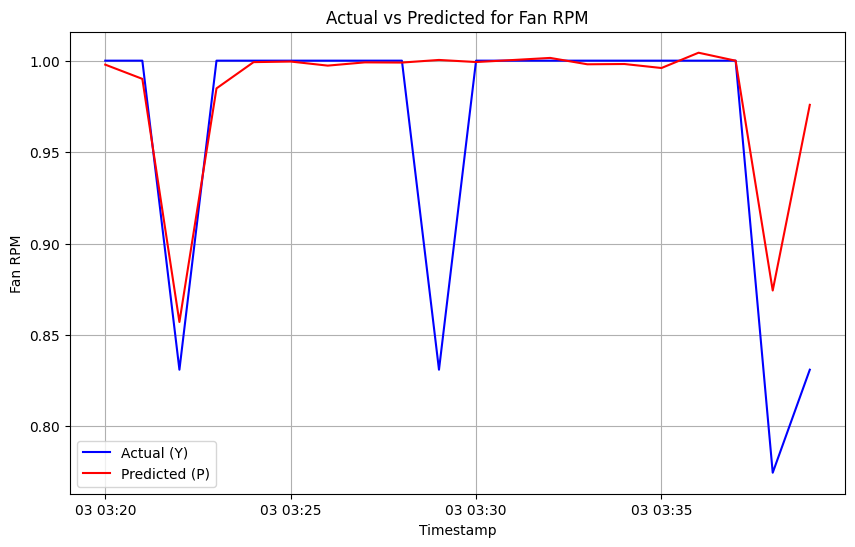

In [47]:
import matplotlib.pyplot as plt

# Choose a column for plotting
column_name = 'Fan RPM'# Example column name

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(Y['Date/Timestamp'], Y[column_name], label='Actual (Y)', color='blue')
plt.plot(P['Date/Timestamp'], P[column_name], label='Predicted (P)', color='red')
plt.xlabel('Timestamp')
plt.ylabel(column_name)
plt.title(f'Actual vs Predicted for {column_name}')
plt.legend()
plt.grid(True)
plt.show()

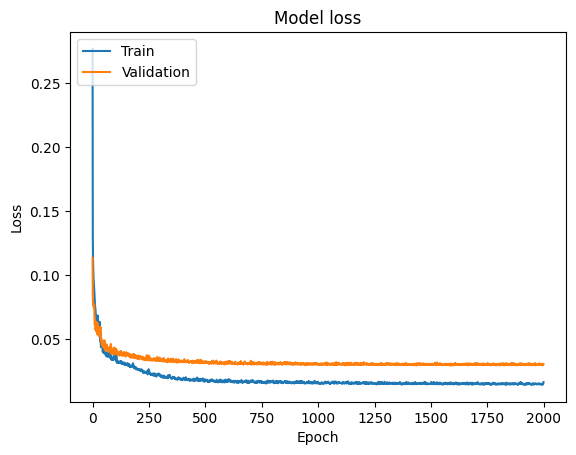

In [31]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [1]:
import matplotlib.dates as mdates

Y = pd.DataFrame(y_test_with_timestamp[10], columns = ['Date/Timestamp', 'RTD', '1st Suct TC1', 'Air Inlet TC2', 'Evap In TC3',
       'Evap Out TC4', '2nd Suct TC6', 'Liquid Line TC7',
       '2nd Sump TC9', 'BPHX TC10', 'Setpoint', 'Voltage', 'WA',
       'CA', '1st RPM', '2nd RPM', 'Fan RPM', 'BUS RTD', 'RSSI',
       'State', 'HxHxRec', 'VscRefStageMSB', 'VscRefStageLSB'])
P = pd.DataFrame(prediction_with_timestamp[10], columns = ['Date/Timestamp', 'RTD', '1st Suct TC1', 'Air Inlet TC2', 'Evap In TC3',
       'Evap Out TC4', '2nd Suct TC6', 'Liquid Line TC7',
       '2nd Sump TC9', 'BPHX TC10', 'Setpoint', 'Voltage', 'WA',
       'CA', '1st RPM', '2nd RPM', 'Fan RPM', 'BUS RTD', 'RSSI',
       'State', 'HxHxRec', 'VscRefStageMSB', 'VscRefStageLSB'])

p_col = ['1st Suct TC1','Evap In TC3','Evap Out TC4','2nd Suct TC6','2nd Sump TC9','BPHX TC10','2nd RPM','Fan RPM','BUS RTD','RSSI','State', 'HxHxRec','RTD','Air Inlet TC2','Liquid Line TC7','Setpoint','Voltage','WA','CA','1st RPM','VscRefStageMSB','VscRefStageLSB']

title_font = {
    'family': 'serif',
    'color': 'black',
    'weight': 'bold',
    'size': 16,
}

for column_name in p_col: # Example column name

    average = np.median (Y[column_name])
    
    max1 = np.max(Y[column_name])
    min1 = np.min(Y[column_name])
    max2 = np.max(P[column_name])
    min2 = np.min(P[column_name])
    maxc = np.max([max1,max2])
    minc = np.min([min1,min2])
    range1 = maxc-minc
    print (max1)
    print(min1)
    print(range1)
    average = (maxc+minc)/2
    print(average)
    flag =0

    plt.figure(figsize=(10, 6))
    plt.plot(Y['Date/Timestamp'], Y[column_name], label='Actual (Y)', color='black')
    plt.plot(P['Date/Timestamp'], P[column_name], label='Predicted (P)', color='red')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.xlabel('Timestamp')
    plt.ylabel(column_name)
    plt.title(f'Actual vs Predicted for {column_name}',fontdict=title_font)
    plt.legend()
    # Set y-axis limits
    if range1 < 0.25:
        plt.ylim(-0.125+average, 0.125+average)
        flag = 1
    plt.grid(True)
    print(flag)
    plt.show()

NameError: name 'pd' is not defined